In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn joblib

In [ ]:
# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
#Loading and Exploring the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\creditcard.csv")
df.head()
df.info()
df.describe()
df.isnull().sum()  # Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


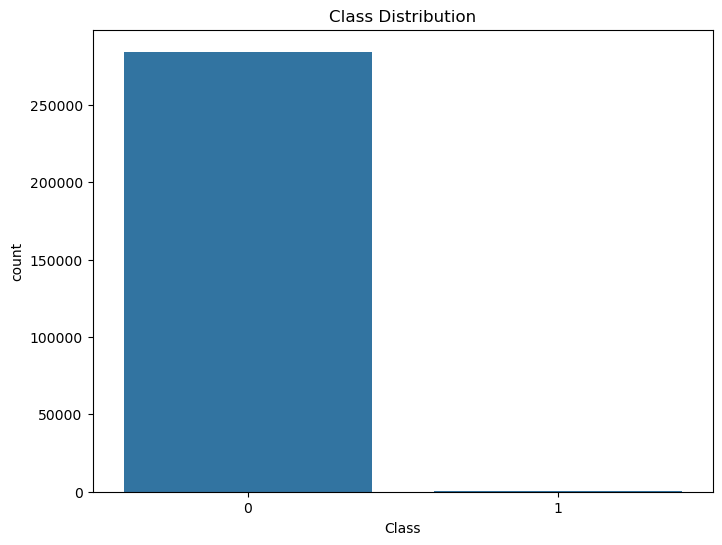

In [5]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [7]:
#separate the features (X) from the target (y) and split the data into training and testing sets:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#scaling the feature to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Training a Logistic Regression Model

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

In [12]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))

[[56854    10]
 [   43    55]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.56      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9990695551420246
Precision: 0.8461538461538461
Recall: 0.5612244897959183
F1-Score: 0.6748466257668712


In [13]:
#Outlier Detection with Isolation Forest and Local Outlier Factor

In [14]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

In [15]:
# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

In [16]:
# Convert -1 to 1 (fraud) and 1 to 0 (normal)
y_pred_if = np.where(y_pred_if == -1, 1, 0)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

In [18]:
# Evaluate both models
print("Isolation Forest:")
print(confusion_matrix(y, y_pred_if))
print(classification_report(y, y_pred_if))

print("\nLocal Outlier Factor:")
print(confusion_matrix(y, y_pred_lof))
print(classification_report(y, y_pred_lof))

Isolation Forest:
[[281755   2560]
 [   203    289]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.59      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807


Local Outlier Factor:
[[281540   2775]
 [   418     74]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.03      0.15      0.04       492

    accuracy                           0.99    284807
   macro avg       0.51      0.57      0.52    284807
weighted avg       1.00      0.99      0.99    284807



In [19]:
#Correlation Analysis

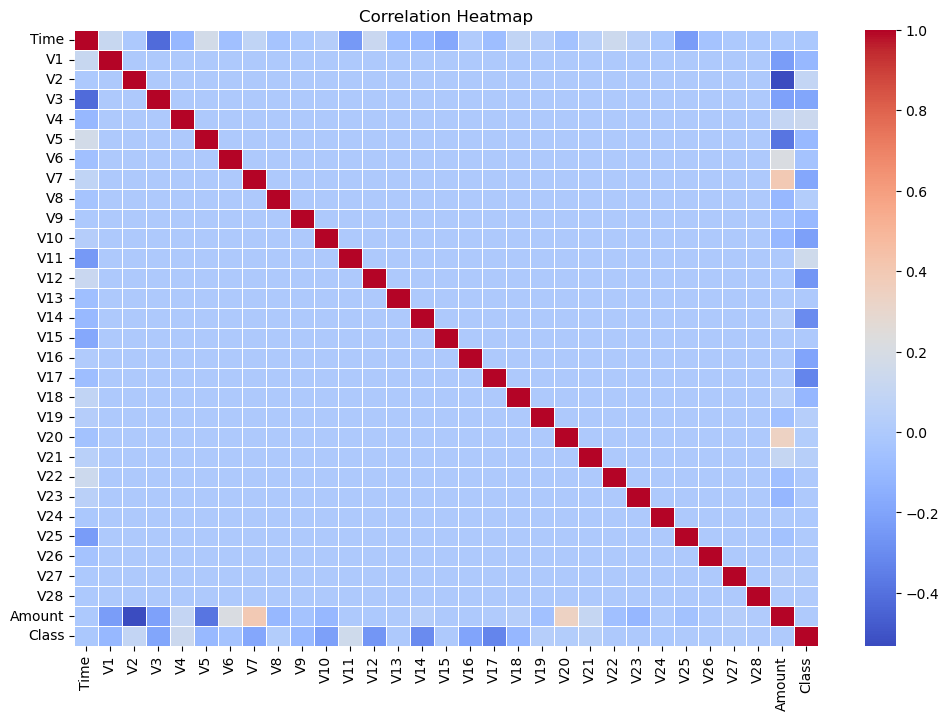

In [23]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#visualize the distribution of the first five features (V1 to V5) for both classes (fraud and non-fraud):

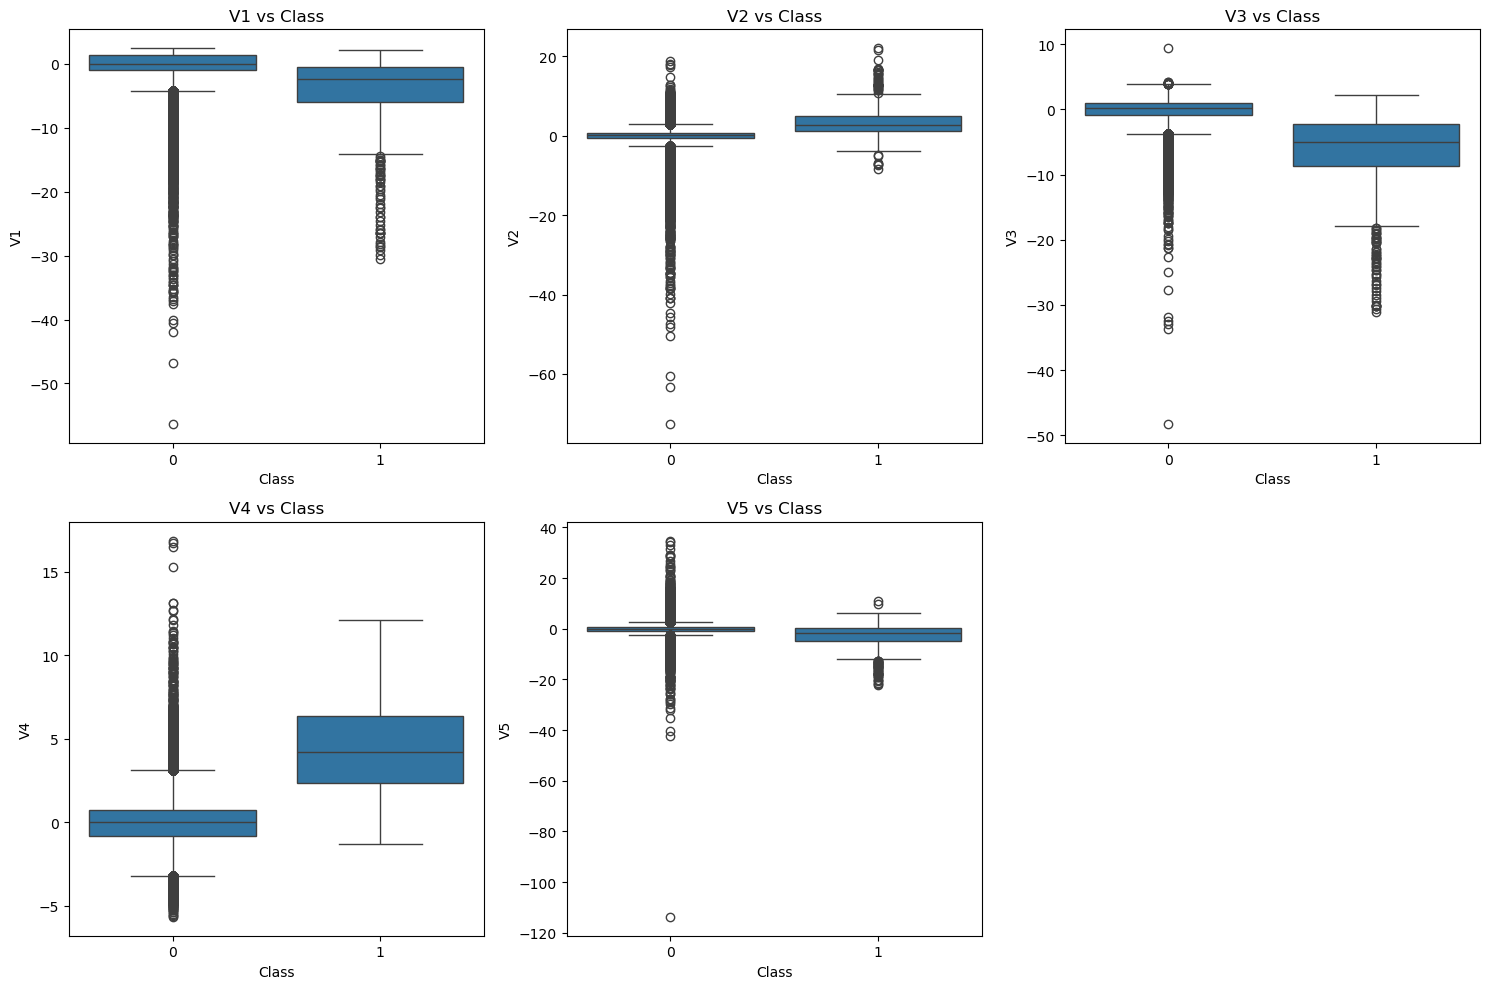

In [24]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

In [25]:
#: Separate and Describe Fraudulent and Non-Fraudulent Transactions

In [26]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print("Fraud Transactions:")
print(fraud.describe())

print("\nNon-Fraud Transactions:")
print(non_fraud.describe())

Fraud Transactions:
                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6.406267  -43.

In [27]:
#compare the performance of all models in terms of accuracy, precision, recall, and F1-score

In [28]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Isolation Forest', 'Local Outlier Factor'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y, y_pred_if), accuracy_score(y, y_pred_lof)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y, y_pred_if), precision_score(y, y_pred_lof)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y, y_pred_if), recall_score(y, y_pred_lof)],
    'F1-Score': [f1_score(y_test, y_pred_lr), f1_score(y, y_pred_if), f1_score(y, y_pred_lof)]
})

print(results)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.999070   0.846154  0.561224  0.674847
1      Isolation Forest  0.990299   0.101439  0.587398  0.173002
2  Local Outlier Factor  0.988789   0.025974  0.150407  0.044298


In [29]:
#Visualizing Amount Distribution by Class

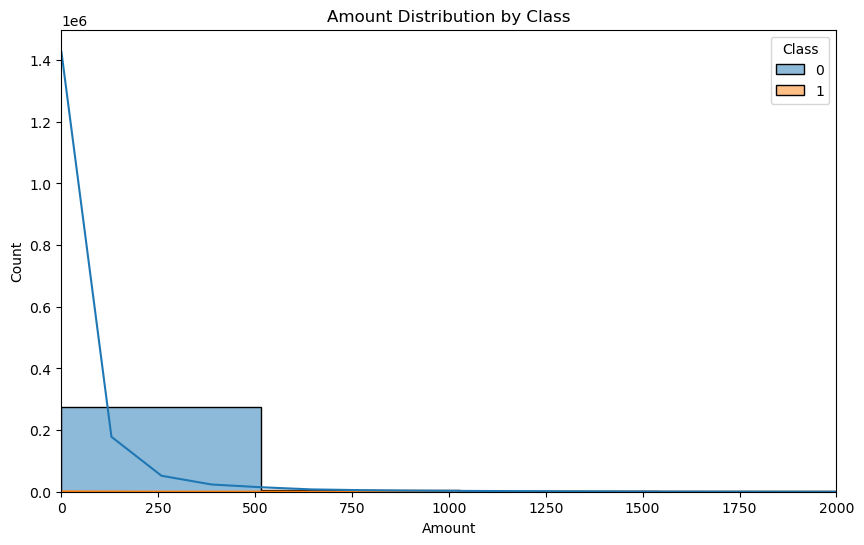

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, kde=True)
plt.title('Amount Distribution by Class')
plt.xlim(0, 2000)
plt.show()